<div align="center">
    <h1> <b><u>BIKE SHARING ASSIGNMENT SUBMISSION</u></b></h1></div>
<div align="right">    
<h2><i>by</i>: <b>Abhinav Tyagi</b></h2>
<h2><i>for</i>: <b>UPGRAD</b></h2>
</div>

<h3><b><u><center>Target</center></u></b></h3>
After surviving the corona associated business crash, the American bike sharing company <b>BoomBikes</b> has hired us to predict forthcoming demand of the bikes to deploy the precious and now diminished resources where the returns can be highest.


<h3><b><u>Required Outcome</u></b></h3>
The company wants to know:
<ol>
    <li><b><i>Variables significant in predicting the demand for shared bikes</i></b></li>
<li><b><i>How well those variables describe the bike demands</i></b></li>
</ol>
<div align="right"><i>let's give them what they want...</i></div>

<hr>
<center><div style="color:#41368F"><h1><b><u>Final Report</u></b></h1></div></center>


<table>
  <tr>
      <td><center><b>Train R-Squared</b></center></td>
    <td><i><div style="color:green">0.824</div></i></td>
  </tr>
    
  <tr>
      <td><center><b>Train R-Squared Adjusted</b></center></td>
    <td><i><div style="color:green">0.821</div></i></td>
  </tr>
  <tr>
      <td><center><b>Test R-Squared</b></center></td>
    <td><i><div style="color:green">0.820</div></i></td>
  </tr>
    <tr>
      <td><center><b>Test R-Squared Adjusted</b></center></td>
    <td><i><div style="color:green">0.812</div></i></td>
  </tr>
    
</table>

<br>
<center><b>Top 3 Predictor Variables</b><center>
<table>
    <tr>
        <th>Variable</th>
        <th>Relation</th>
    </tr>
    
  <tr>
      <td><center><b>temp (Temperature)</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in temp yields bike bookings raised by 0.563615 times.</div></i></td>
  </tr>
    
  <tr>
      <td><center><b>weathersit_3 (Weather Situation 3)</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in weathersit_3 yields bike bookings decreased by -0.306992 times.</div></i></td>
  </tr>
  <tr>
      <td><center><b>yr (Year)</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in yr yields bike bookings raised by 0.230846 times.</div></i></td>
  </tr>
    
</table>
    
<center><div style="color:#77AAFC"><h3><u>Other Variables Of Importance</u></h3></div></center>
    
<table>
    <tr>
        <th>Variable</th>
        <th>Relation</th>
    </tr>
    
  <tr>
      <td><center><b>season_4</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in season_4 yields bike bookings raised by 0.128744 times.</div></i></td>
  </tr>
    
  <tr>
      <td><center><b>windspeed</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in windspeed yields bike bookings decreased by -0.155191 times.</div></i></td>
  </tr>

    
</table>
    <center><div style="color:#3647B5"><h2>Suggestions:</h2></div></center>
    <center><i>Most important variables are temp, weathersit_3 and year. Followed by season_4 and windspeed to predict maximum bike bookings.</i></center>
<hr>

<b><h4>Data Loading and Basic Analysis</b></h4>

In [1]:
#importing all the standard libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#to make our prediction model we would be using scikit learn
# RFE And Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
bike = pd.DataFrame(pd.read_csv("datasets/day.csv"))

In [3]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
print(bike.shape)

(730, 16)


<div style="color:#41368F;"><h4><u><b>Initial Conclusions</b></u>:</h4></div>
<ol>
    <li>DataSet has,<br> <i>Rows : <u>730</u></i> <br><i> Columns : <u>16</u></i></li>
<li>dteday is the Only Date Column</li>
<li>Except dteday, everyother column is a continuous value, ie, int or float type.</li>
</ol>

<h2><u>Data Inspection and Correction</u></h2>

<div style="color:#41368F;"><h3><i>1. Null Values</i></h3></div>

In [7]:
print(round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)) #Column Wise
print(round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)) #Axis switched over to rows.

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64
0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64


<h3> <div style="color:#41368F" align="center"><b>Conclusion</b></div></h3>
<div style="color:#3647B5;" align="center"><u><b>No Null Values Found</b></u></div>

<div style="color:#41368F;"><h3><i>2. Duplicates</i></h3></div>

In [8]:
duplicates = bike.copy()
duplicates.drop_duplicates(subset=None, inplace=True)

<div style="color:#77AAFC"><i>(If Duplicate Rows Are Present, They Are Now Dropped)</i></div>

In [9]:
#Checking the Shape
if (duplicates.shape == bike.shape):
    print("No Change In Data After Running The Copy Of Original Data Set through Drop Duplicates Method. \nTherefore, Original Data is Free of Duplicates and Can Be Used As It Is!")
else:
    print("Shapes Dont Match, Original Data Rejected, Duplicate Needs to be Used.")

No Change In Data After Running The Copy Of Original Data Set through Drop Duplicates Method. 
Therefore, Original Data is Free of Duplicates and Can Be Used As It Is!


<h3> <div style="color:#41368F" align="center"><b>Conclusion</b></div></h3>
<div style="color:#3647B5;" align="center"><u><b>No Duplicates Found. Using Original Intact Data.</b></u></div>
<hr>

<div style="color:#41368F;"><h1><b>Data Cleaning</b></h1></div>

In [10]:
# Copying data frame into a new variable without copying the column with unique values.

dummyBike = bike.iloc[:,1:16]
for column in dummyBike:
    print (dummyBike[column].value_counts(ascending=False),'\n\n\n\n') #Space Added For Greater Clarity

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 




3    188
2    184
1    180
4    178
Name: season, dtype: int64 




0    365
1    365
Name: yr, dtype: int64 




1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 




0    709
1     21
Name: holiday, dtype: int64 




6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 




1    499
0    231
Name: workingday, dtype: int64 




1    463
2    246
3     21
Name: weathersit, dtype: int64 




26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 




32.73440    4
18.78105    3
31.85040    3
28.59875    2

<h3> <div style="color:#41368F" align="center"><b>Conclusion</b></div></h3>
<div style="color:#3647B5;" align="center"><u><b>Dataset is quite clean. No Junk Values Found.</b></u></div>
<hr>


<div style="color:#41368F;"><h1><b>Inconsequential Column Removal</b></h1></div>

<i>Removing the Following Columns:</i>
<ol>
<li><b>casual</b> <i>This column represents booking by a category of customer. A mismatch with our objective of find total count of bikes without a categorical breakdown.</i></li>
<li><b>registered</b> <i>Again, column representing booking based on a category of people. Irrelevant</i> </li>
<li><b>dteday</b> <i>Column representing date type. A presence of seperate columns based on day, mm, year, makes this unnecessary and therefore can be removed.</i></li>
<li><b>instant</b> <i>Indexing variable. Removing.</i></li>
</ol>

In [11]:
print(bike.columns) #inpecting our columns once again.

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [12]:
#creating a new bike variable to leave the original 
#dataset intact for future reference and cross checking and comparisions

cleanBike = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
cleanBike.info() #checking our new variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<div style="color:#41368F;"><h1><b>Encoding Categorical Variables Into Dummy Representations</b></h1></div>

<b>Categorical Columns Are:</b>
<ol>
<li><i>season</i></li>    
<li><i>weekday</i></li>    
<li><i>mnth</i></li>    
<li><i>weathersit</i></li>        
</ol>


In [13]:
cleanBike['weekday'] = cleanBike['weekday'].astype('category')
cleanBike['season'] = cleanBike['season'].astype('category')
cleanBike['mnth'] = cleanBike['mnth'].astype('category')
cleanBike['weathersit'] = cleanBike['weathersit'].astype('category')

cleanBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


/var/folders/3x/c01c5x8x62n0cnbv2mfh_q1w0000gn/T/ipykernel_17718/2168407181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanBike['weekday'] = cleanBike['weekday'].astype('category')
/var/folders/3x/c01c5x8x62n0cnbv2mfh_q1w0000gn/T/ipykernel_17718/2168407181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanBike['season'] = cleanBike['season'].astype('category')
/var/folders/3x/c01c5x8x62n0cnbv2mfh_q1w0000gn/T/ipykernel_17718/2168407181.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [14]:
cleanBike=pd.get_dummies(cleanBike, drop_first=True)
cleanBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [15]:
print(cleanBike.shape)

(730, 30)


<hr>

<div style="color:#41368F;"><h2> Data Preparation Before Feeding to Scikit Learn.</h2></div>

<i>We will go with a 70/30 split between train/test data.</i>
In layman's terms it would simply mean we would take our entire data and make a dataset containing 70 percent of it for training our model and then using the rest of the 30 percent data that our training model is blind to, to find the accuracy of our model.

In [16]:
np.random.seed(0)
df_train, df_test = train_test_split(cleanBike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [17]:
print(df_train.shape)
df_train.info()

(510, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 

In [18]:
print(df_test.shape)
df_test.info()

(219, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 n

<div style="color:#41368F;"><h2>EDA: <u>Exploratory Data Analysis On df_train Dataset</u></h2></div>

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [20]:
print (df_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


<div style="color:#77AAFC"><h4> Storing all the Continuous Data in a Single Variable Dataset</h4></div>

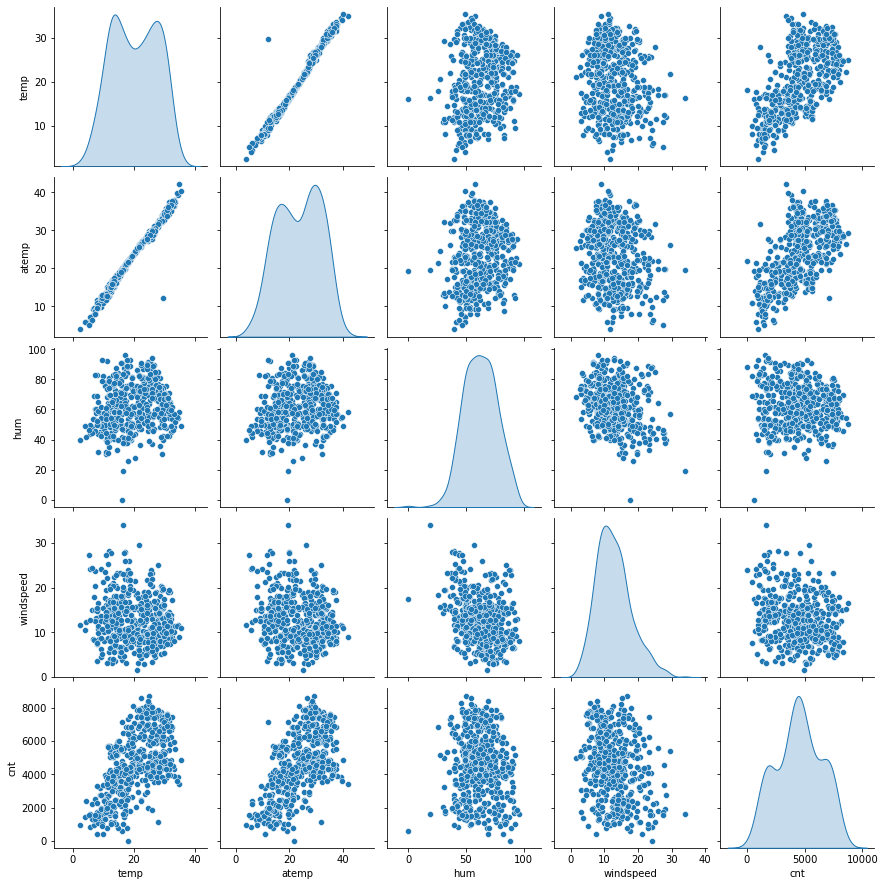

In [21]:
conBike = df_train[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(conBike, diag_kind='kde')
plt.show()

<center><div style="color:#77AAFC"><u><h3>Conclusions</h3></u></div></center>
<center>A Linear Correlation Between cnt, temp and atemp can be observered</center>


<div style="color:#77AAFC"><h2>Categorical Variable Representation</h2></div>

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

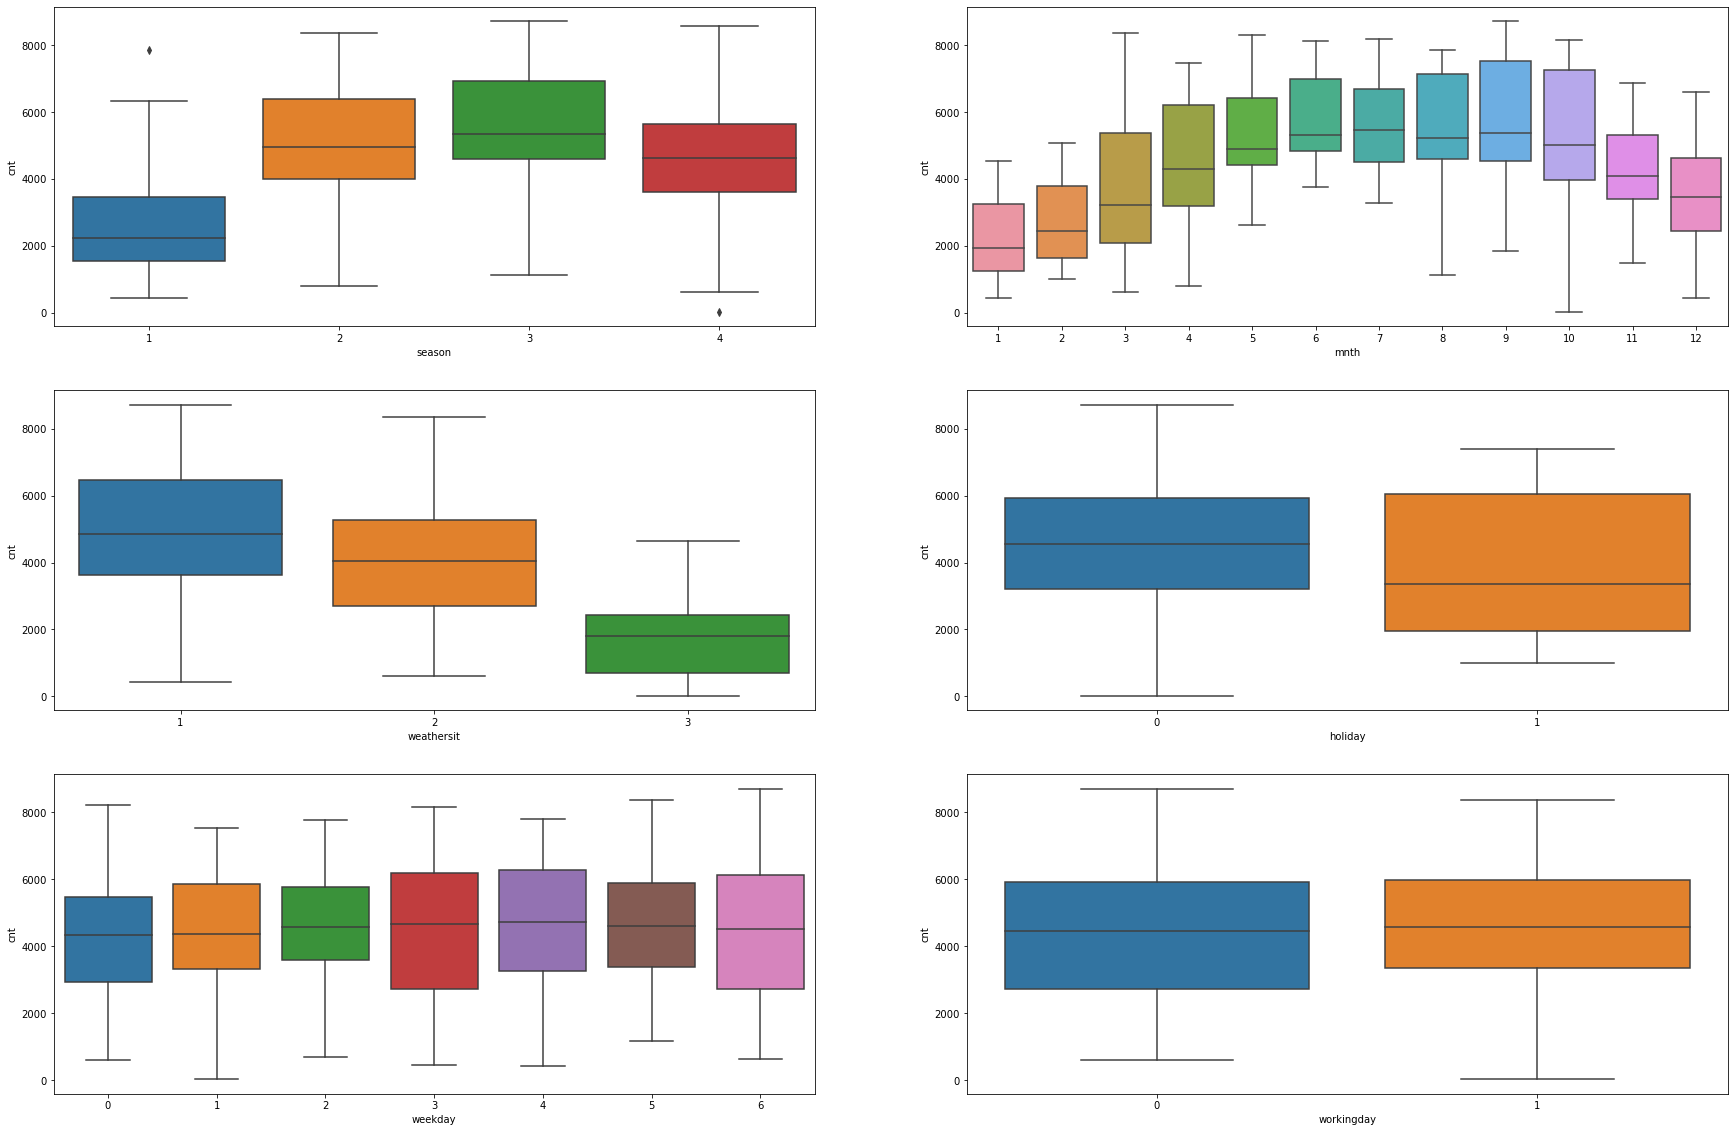

In [23]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3,2,2)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,2,3)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.subplot(3,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(3,2,6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.show()

<center><div style="color:#77AAFC"><u><h3>Conclusions</h3></u></div></center>

<b>Number of categorical variables: 6</b>

<table>
  <tr>
    <th>Categorical Variable</th>
    <th>Effect On Dependent Variable</th>
  </tr>
  <tr>
      <td><center><div style="color:green">mnth</div></center></td>
    <td><i>10% Bookings at 4000 per month seen in month 5th, 6th, 7th, 8th, and 9th. Making mnth a good predictor for the dependent variable</i></td>
  </tr>
    
  <tr>
      <td><center><div style="color:red">weekday</div></center></td>
    <td><i>Trend of booking on each day of the week aren't well seperated, therefore inconsequential for the dependent variable.</i></td>
  </tr>
  <tr>
      <td><center><div style="color:green">workingday</div></center></td>
    <td><i>69% Bookings received on workingday, putting the median at 5000 bookings. Making this an excellent predictor.</i></td>
  </tr>

  <tr>
    <td><center><div style="color:red">holiday</div></center></td>
    <td><i>97.6% Bookings received on holidays, indicating a data bias as the holidays are marked incorrectly. Can't be used therefore, as a predictor</i></td>
  </tr>
  <tr>
      <td><center><div style="color:green">weathersit</div></center></td>
    <td><i>67% Bookings observed during weathersit1, putting the median at 5000 bookings. Good predictor therefore.</i></td>
  </tr>
  <tr>
      <td><center><div style="color:green">season</div></center></td>
    <td><i>32% Bookings Observed On Season 3, 27% in season2 and 25% in season4. Indicating it being a good predictor.</i></td>
  </tr>
</table>

<div style="color:#77AAFC"><h2>Correlation Matrix</h2></div>

<AxesSubplot:>

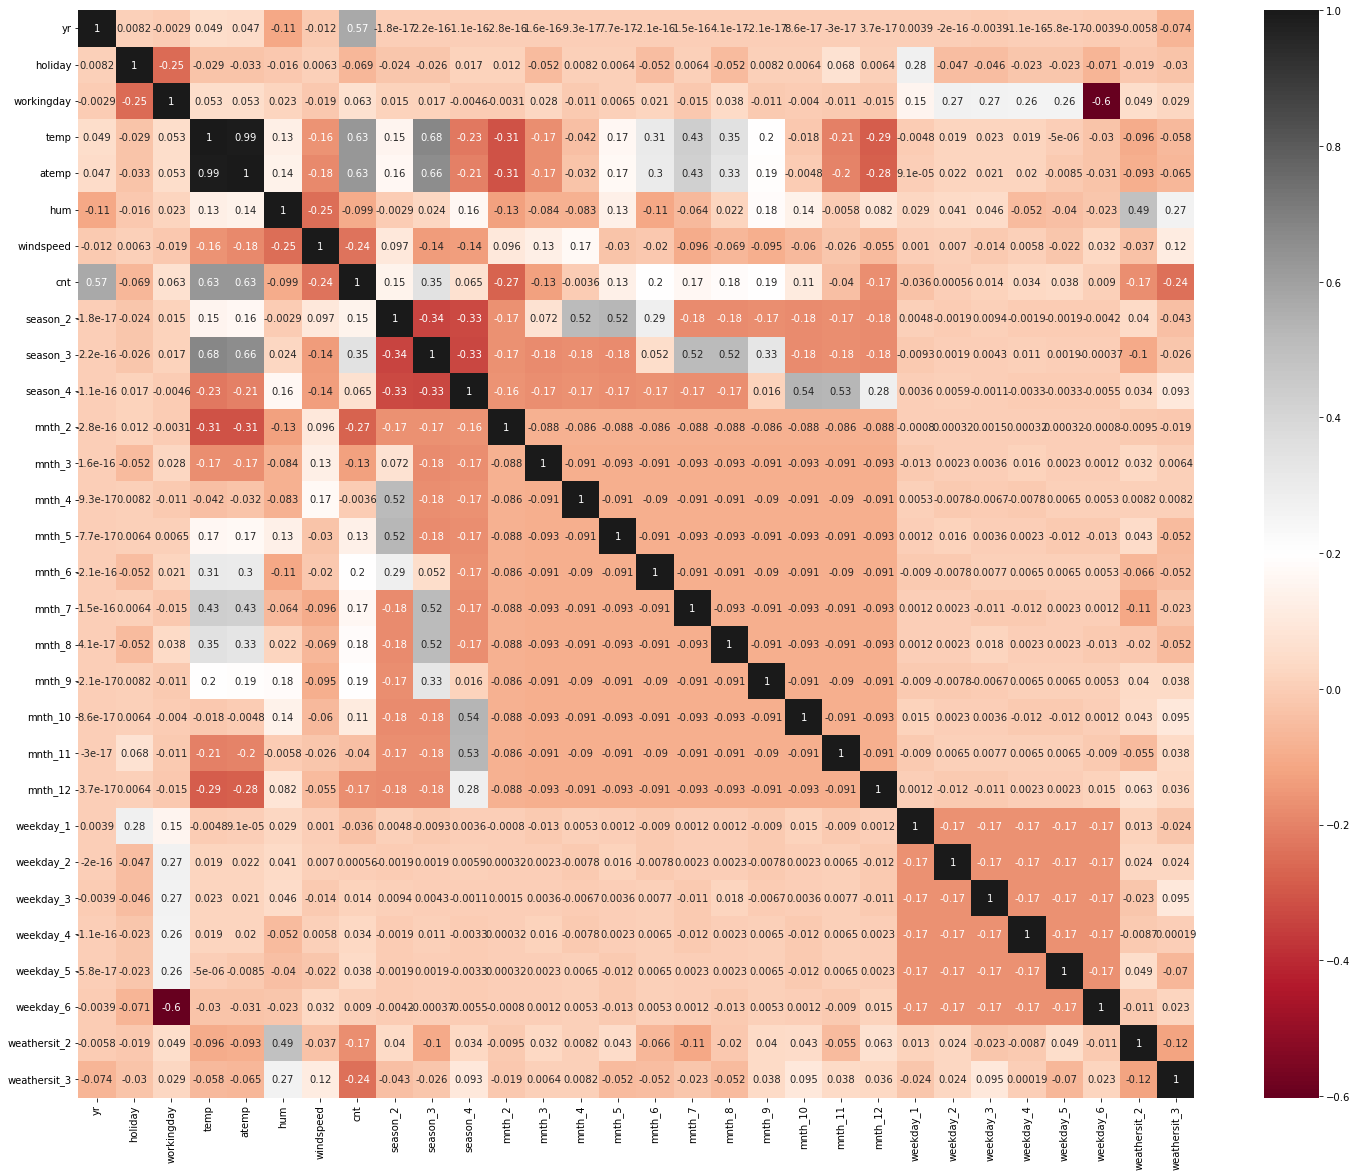

In [24]:
plt.figure(figsize=(25,20))
sns.heatmap(cleanBike.corr(), annot=True, cmap="RdGy")

## Rescaling

In [25]:
scaler = MinMaxScaler()
print(df_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [26]:
#After examination lets apply scaler() to all the continuous variables

continuous_variables = ['cnt','temp','windspeed','hum','atemp']
df_train[continuous_variables]=scaler.fit_transform(df_train[continuous_variables])

In [27]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="color:#41368F"><h2>LINEAR MODELLING</h2></div>

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

<div style="color:#41368F"><h3>Recursive Feature Elimination</h3></div>

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 9),
 ('weekday_5', False, 7),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [32]:
column = X_train.columns[rfe.support_]

In [33]:
print (column)

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [34]:
X_train_rfe=X_train[column]

<hr>
<center><div style="color:#41368F"><h2>Modelling With 'STATS MODEL'</h2></div></center>

In [35]:
# Examining VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features     VIF
2           temp  384.22
3          atemp  363.12
4            hum   17.52
7       season_3    7.09
5      windspeed    4.71
1     workingday    4.61
6       season_2    3.54
8       season_4    3.01
13  weathersit_2    2.14
0             yr    2.02
12     weekday_6    1.80
11       mnth_10    1.66
10        mnth_9    1.28
9         mnth_3    1.20
14  weathersit_3    1.17


In [36]:
X_train_lm1 = sm.add_constant(X_train_rfe)
linearRegression = sm.OLS(y_train, X_train_lm1).fit()
linearRegression.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [37]:
print (linearRegression.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.28e-186
Time:                        19:06:11   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

<center><div style="color:#77AAFC"><h3><u>Another Model</u></h3></div></center>

In [38]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

<center><div style="color:#77AAFC"><h3><u>Examining VIF</u></h3></div></center>

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features    VIF
2           temp  23.21
3            hum  17.23
6       season_3   7.01
1     workingday   4.60
4      windspeed   4.55
5       season_2   3.54
7       season_4   3.01
12  weathersit_2   2.14
0             yr   2.02
11     weekday_6   1.79
10       mnth_10   1.66
9         mnth_9   1.28
8         mnth_3   1.20
13  weathersit_3   1.17


In [40]:
X_train_lm2 = sm.add_constant(X_train_new)
linearRegression2 = sm.OLS(y_train, X_train_lm2).fit()
linearRegression2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [41]:
print(linearRegression2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.00e-187
Time:                        19:06:11   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

<center><div style="color:#77AAFC"><h2>Model 3</h2></div></center>
<center>

<ol>
<li>Removing hum as very high VIF value.</li>    
<li>Retaining temp because of impact of temperature on bookings</li>    
<ol>
    
</center>

In [42]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

<center><div style="color:#77AAFC"><h3><u>Examining VIF</u></h3></div></center>

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features    VIF
2           temp  16.81
5       season_3   6.75
3      windspeed   4.27
1     workingday   4.11
4       season_2   3.51
6       season_4   2.89
0             yr   2.02
9        mnth_10   1.66
10     weekday_6   1.66
11  weathersit_2   1.54
8         mnth_9   1.27
7         mnth_3   1.20
12  weathersit_3   1.08


In [44]:
X_train_lm3 = sm.add_constant(X_train_new)
#Make a fitted model
linearRegression3 = sm.OLS(y_train, X_train_lm3).fit()

In [45]:
linearRegression3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [46]:
print(linearRegression3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.52e-184
Time:                        19:06:11   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

<center><div style="color:#41368F"><h2>4th Model</h2></div></center>
<center>

<ol>
<li>Removing season3 as very high VIF value.</li>    
<li>Retaining temp because of impact of temperature on bookings</li>    
<ol>
    
</center>

In [47]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

<center><div style="color:#77AAFC"><h3><u>Examining VIF</u></h3></div></center>

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [49]:
X_train_lm4 = sm.add_constant(X_train_new)
linearRegression4 = sm.OLS(y_train, X_train_lm4).fit()
linearRegression4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [50]:
print (linearRegression4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.56e-181
Time:                        19:06:12   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

<center><div style="color:#41368F"><h2>5th Model</h2></div></center>
<center>

<ol>
<li>Removing mnth_10 as very high p-value.</li>        
<ol>
    
</center>

In [51]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

<center><div style="color:#77AAFC"><h3><u>Examining VIF</u></h3></div></center>

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [53]:
X_train_lm5 = sm.add_constant(X_train_new)
linearRegression5 = sm.OLS(y_train, X_train_lm5).fit()
linearRegression5.params
print(linearRegression5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.39e-181
Time:                        19:06:12   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

<center><div style="color:#41368F"><h2>6th Model</h2></div></center>
<center>

<ol>
<li>Removing mnth_3 as very high p-value.</li>        
<ol>
    
</center>

In [54]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

<center><div style="color:#77AAFC"><h3><u>Examining VIF</u></h3></div></center>

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [56]:
X_train_lm6 = sm.add_constant(X_train_new)
linearRegression6 = sm.OLS(y_train, X_train_lm6).fit()

In [57]:
linearRegression6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [58]:
print(linearRegression6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          3.77e-181
Time:                        19:06:12   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

<center><div style="color:#77AAFC"><u><h3>Conclusions</h3></u></div></center>
<center><b>Observable Distinctions of model:</b>
    p-values : <i>Significant</i>
    Multicollinearity Between Predictors : <i>Low</i>
    <br>
    <b>Inference : Model is Very Good. Chosen As Our Final Model</b>
</center>


<div style="color:#41368F"><h2><u>Final Observations <i>(linearRegression6)</i></u></h2></div>

<div style="color:#3647B5"><h4><b>Coefficient Values</b></h4></div>
<table>
  <tr>
    <th>Variable</th>
    <th>Coefficient Values</th>
    <th>Interpretations</th>
  </tr>
    
    
  <tr>
      <td><center>yr</center></td>
    <td><i><div style="color:green">0.230846</div></i></td>
    <td><i><div style="color:#3647B5">Per Unit Increase in yr yields bike bookings raised by 0.230846 times.</div></i></td>
  </tr>
    
  <tr>
      <td><center>const</center></td>
    <td><i><div style="color:green">0.084143</div></i></td>
      <td><i><div style="color:#3647B5">Per Unit Increase in yr yields bike bookings raised by 0.084143 times.</div></i></td>
  </tr>
    
    
    
  <tr>
      <td><center>workingday</center></td>
    <td><i><div style="color:green">0.043203</div></i></td>
      <td><i><div style="color:#3647B5">Per Unit Increase in yr yields bike bookings raised by 0.043203 times.</div></i></td>
  </tr>
  <tr>
      <td><center>temp</center></td>
    <td><i><div style="color:green">0.563615</div></i></td>
      <td><i><div style="color:#3647B5">Per Unit Increase in yr yields bike bookings raised by 0.563615 times.</div></i></td>
  </tr>

  <tr>
    <td><center>windspeed</center></td>
    <td><i><div style="color:green">-0.155191</div></i></td>
      <td><i><div style="color:#3647B5">Per Unit Increase in windspeed yields bike bookings decreased by -0.155191 times.</div></i></td>
  </tr>
  <tr>
      <td><center>season_2</center></td>
    <td><i><div style="color:green">0.082706</div></i></td>
      <td><i><div style="color:#3647B5">Per Unit Increase in season_2 yields bike bookings raised by 0.082706 times.</div></i></td>
  </tr>
     <tr>
      <td><center>season_4</center></td>
    <td><i><div style="color:green">0.128744</div></i></td>
         <td><i><div style="color:#3647B5">Per Unit Increase in season_4 yields bike bookings raised by 0.128744 times.</div></i></td>
  </tr>
    <tr>
      <td><center>mnth_9</center></td>
    <td><i><div style="color:green">0.094743</div></i></td>
        <td><i><div style="color:#3647B5">Per Unit Increase in mnth_9 yields bike bookings raised by 0.094743 times.</div></i></td>
  </tr>
    <tr>
      <td><center>weekday_6</center></td>
    <td><i><div style="color:green">0.056909</div></i></td>
        <td><i><div style="color:#3647B5">Per Unit Increase in weekday_6 yields bike bookings raised by 0.056909 times.</div></i></td>
  </tr> 
    <tr>
      <td><center>weathersit_2</center></td>
    <td><i><div style="color:green">-0.074807</div></i></td>
        <td><i><div style="color:#3647B5">Per Unit Increase in yr yields bike bookings decreased by -0.074807 times.</div></i></td>
  </tr> 
    <tr>
      <td><center>weathersit_3</center></td>
    <td><i><div style="color:green">-0.306992</div></i></td>
        <td><i><div style="color:#3647B5">Per Unit Increase in weathersit_3 yields bike bookings decreased by -0.306992 times.</div></i></td>
  </tr>
</table>

<div style="color:#77AAFC"><h3>Conclusions</h3></div>
No cofficients = 0,
Therefore, All Null Hypothesis stands rejected.


<br><br>

<div style="color:#3647B5"><h3><b>F Statistics</b></h3></div></center>

<table>
  <tr>
      <td><center>F-statistic</center></td>
    <td><i><div style="color:green">233.8</div></i></td>
  </tr>
    
  <tr>
      <td><center>Prob (F-statistic)</center></td>
    <td><i><div style="color:green">3.77e-181</div></i></td>
  </tr>

</table>

A higher F-Stastics value corresponds to a more signficant Model.

Here, with an F-statistic of 233.8 and p-Value of 0.00, it is clear that model is significant.

<br><br>

<div style="color:#3647B5"><h3><b>Best fitted surface equation</b></h3></div></center>

<i>cnt = 0.084143 + (**yr** × 0.230846) + (**workingday** × 0.043203) + (**temp** × 0.563615) − (**windspeed** × 0.155191) + (**season2** × 0.082706) + (**season4** ×0.128744) + (**mnth9** × 0.094743) + (**weekday6** ×0.056909) − (**weathersit2** × 0.074807) − (**weathersit3** × 0.306992)</i>



/opt/anaconda3/envs/openblas-np/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

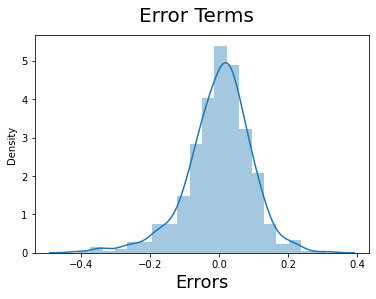

In [59]:
y_train_pred = linearRegression6.predict(X_train_lm6)
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

<center><div style="color:#3647B5"><h3><b><u>Conclusions:</u></b></h3></div></center>
<center>Residuals are normally distributed. <br><i>Linear Regression Stands Validated.</i></center>

In [60]:
cleanBike=cleanBike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

NameError: name 'bike_num' is not defined

<center><div style="color:#3647B5"><h3><b><u>Conclusions</u></b></h3></div></center>
<center>Linear Relationship between temp and atemp variables observed with predictor <i>cnt</i></i></center>

<center><b><div style="color:#77AAFC"><h3>No Observable MultiCollinearity between the Predictor Variables</h3></div></b></center>

In [ ]:
#Another VIF Exam
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

<center><div style="color:#3647B5"><h3><b><u>Conclusions</u></b></h3></div></center>
<center><i>Absence of Multicollinearity between the predictor variables, as values are consistently below 5</i></center>

<center><div style="color:#41368F"><h1><b><u>Final Prediction with Our Chosen Model</u></b></h1></div></center>

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

In [ ]:
df_test.describe()

<center><div style="color:#3647B5"><h3><b><u>Splitting Into X_test and y_test</u></b></h3></div></center>

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test
x_test.info()

In [ ]:
column1 = X_train_new.columns
X_test=X_test[col1]
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

In [ ]:
y_pred=linearRegression6.predict(x_test_lm6)

<center><div style="color:#41368F"><h1><b><u>Evaluating Model</u></b></h1></div></center>

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha = .6)
fig.suptitle('y_test VS y_pred', fontsize = 21)
plt.xlabel('y_test',fontsize = 19)
plt.ylabel('y_pred', fontsize=17)
plt.show()

<center><div style="color:#41368F"><h1><b><u>R-Squared Value of test</u></b></h1></div></center>

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
#Adjusted R-Sqaured Value

r2= 0.8203092200749708
X_test.shape

In [ ]:
n=X_test.shape[0]
p=X_test.shape[1]

adjusted_r2 = 1-(1-r2)+(n-1)/(n-p-1)
print (adjusted_r2)

<hr>
<center><div style="color:#41368F"><h1><b><u>Report</u></b></h1></div></center>


<table>
  <tr>
      <td><center><b>Train R-Squared</b></center></td>
    <td><i><div style="color:green">0.824</div></i></td>
  </tr>
    
  <tr>
      <td><center><b>Train R-Squared Adjusted</b></center></td>
    <td><i><div style="color:green">0.821</div></i></td>
  </tr>
  <tr>
      <td><center><b>Test R-Squared</b></center></td>
    <td><i><div style="color:green">0.820</div></i></td>
  </tr>
    <tr>
      <td><center><b>Test R-Squared Adjusted</b></center></td>
    <td><i><div style="color:green">0.812</div></i></td>
  </tr>
    
</table>

<br>
<center><b>Top 3 Predictor Variables</b><center>
<table>
    <tr>
        <th>Variable</th>
        <th>Relation</th>
    </tr>
    
  <tr>
      <td><center><b>temp (Temperature)</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in temp yields bike bookings raised by 0.563615 times.</div></i></td>
  </tr>
    
  <tr>
      <td><center><b>weathersit_3 (Weather Situation 3)</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in weathersit_3 yields bike bookings decreased by -0.306992 times.</div></i></td>
  </tr>
  <tr>
      <td><center><b>yr (Year)</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in yr yields bike bookings raised by 0.230846 times.</div></i></td>
  </tr>
    
</table>
    
<center><div style="color:#77AAFC"><h3><u>Other Variables Of Importance</u></h3></div></center>
    
<table>
    <tr>
        <th>Variable</th>
        <th>Relation</th>
    </tr>
    
  <tr>
      <td><center><b>season_4</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in season_4 yields bike bookings raised by 0.128744 times.</div></i></td>
  </tr>
    
  <tr>
      <td><center><b>windspeed</b></center></td>
    <td><i><div style="color:green">Per Unit Increase in windspeed yields bike bookings decreased by -0.155191 times.</div></i></td>
  </tr>

    
</table>
    <center><div style="color:#3647B5"><h2>Suggestions:</h2></div></center>
    <center><i>Most important variables are temp, weathersit_3 and year. Followed by season_4 and windspeed to predict maximum bike bookings.</i></center>
<hr>

<center><div style="color:#41368F"><h1>THANK YOU!</h1></div></center>